In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import matplotlib.pyplot as plt

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside Drained_after_socializing  Friends_circle_size  Post_frequency Personality
0               4.0         No                      4.0            6.0                        No                 13.0             5.0   Extrovert
1               9.0        Yes                      0.0            0.0                       Yes                  0.0             3.0   Introvert
2               9.0        Yes                      1.0            2.0                       Yes                  5.0             2.0   Introvert
3               0.0         No                      6.0            7.0                        No                 14.0             8.0   Extrovert
4               3.0         No                      9.0            4.0                        No                  8.0             5.0   Extrovert
0.8568548387096774


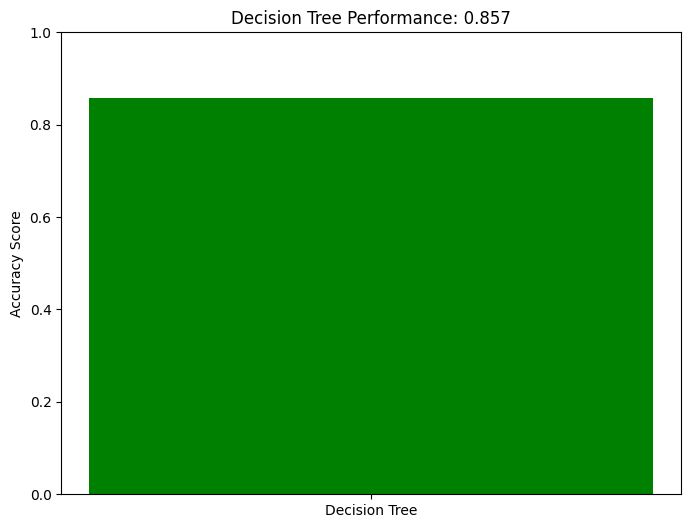

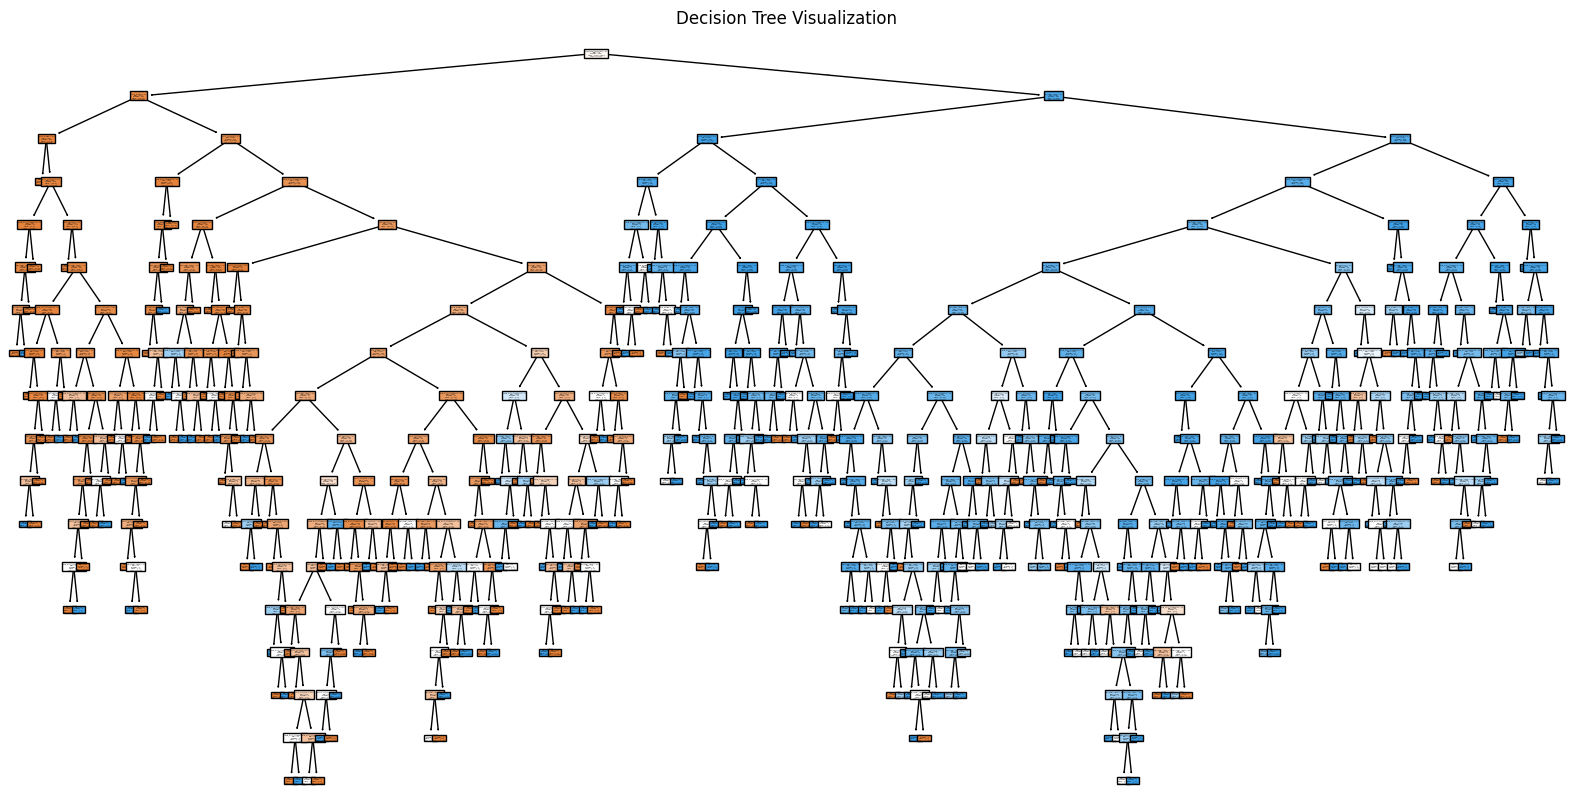

In [15]:
dataset = pd.read_csv(r"C:\Users\Prachi Jariwala\Desktop\Dataset\personality_dataset.csv")

df = pd.DataFrame(dataset) #converts into table
df = df.dropna() #drop the missing values, na=not available, it drops the values which are not available like missing values
print(df.head().to_string()) #print the 1st 4 rows
X = df.drop(["Personality"],axis = 1) #it drops the personality column, from X we drop personality column, seperate last from rest
y = df["Personality"] #only last column is included

#Use label Encoder only for y
col_list = [i for i in pd.DataFrame(X).columns] #it shows the list of columns(x) in out dataset
encoder = OrdinalEncoder() #converts char into numbers 
X = encoder.fit_transform(X) #rest of the columns
target_encoder = LabelEncoder() #converts char into numbers
y = target_encoder.fit_transform(y) #last column only
train_X  ,  test_X ,  train_y , test_y = train_test_split(X , y , train_size=0.8, test_size=0.2 , random_state=1234) #only splitting x&y , not training, 0.8=uses 80% of data for training, 0.2=uses 20% of data for testing,random_state= ramdomizer any values we can put

model = DecisionTreeClassifier()
score = 0 #checking the score of model

model.fit(train_X,train_y) #it trains the data trainx are the input features , trainy are the actual values
prediction = model.predict(test_X) #it tests on remaining half of the rows
score = sum(test_y==prediction)/len(test_y) #it matches the prediction of model with actual values, len=original length of y

print(score)

%matplotlib inline

fig, ax = plt.subplots(figsize=(8,6))
ax.bar("Decision Tree", score, color='green' if score > 0.8 else 'orange' if score > 0.6 else 'red') #color of graph
ax.set_ylim(0, 1) #limit of yaxis
ax.set_ylabel("Accuracy Score")
ax.set_title(f"Decision Tree Performance: {score:.3f}") #the 1st 3 digits of prediction it will show
plt.show()


plt.figure(figsize=(20,10)) # it creates the blank page of our given length, for plot tree
plot_tree(model,filled=True,feature_names=col_list,class_names=target_encoder.classes_) #it shows how the tree should look,target_encoder.classes_=list of all the possible output classes that the model could predict
plt.title("Decision Tree Visualization")
plt.show()